In [1]:
import os

import ase.io
import ase.atoms
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

### Single particle loading for experiments: 

In [2]:
particle = ase.io.read(os.path.join('..', 'data', 'S_random_1.xyz'))
particle

Atoms(symbols='Au10SCH2C4H2C2H2C4H2CSAu10', pbc=False)

In [21]:
def get_particle_symbols(particle, *idxes):
    return [particle.get_chemical_symbols()[idx] for idx in idxes]
 
 
def generate_feature_id(particle, *idxes):
    symbols = get_particle_symbols(particle, *idxes)
    return "".join([f"{s}{idx}" for s, idx in zip(symbols, idxes)])
 
    
def add_dst_feature(df, idx1, idx2):
    particle = df.loc[0, 'obj']
    feature_name = f"dst{generate_feature_id(particle, idx1, idx2)}"
    df[feature_name] = df['obj'].apply(lambda p: p.get_distance(idx1, idx2))
 
    
def add_angle_feature(df, idx1, idx2, idx3):
    particle = df.loc[0, 'obj']
    feature_name = f"ang{generate_feature_id(particle, idx1, idx2, idx3)}"
    df[feature_name] = df['obj'].apply(lambda p: p.get_angle(idx1, idx2, idx3))
    
    
def add_dihedral_feature(df, idx1, idx2, idx3, idx4):
    particle = df.loc[0, 'obj']
    feature_name = f"dih{generate_feature_id(particle, idx1, idx2, idx3, idx4)}"
    df[feature_name] = df['obj'].apply(lambda p: p.get_dihedral(idx1, idx2, idx3, idx4))
    

In [9]:
def load_lines_after_specified_one(path: str, specified_line: str):
    comments = []
    next_line_is_comment = False

    with open(path) as f:
        for line in f:
            if next_line_is_comment:
                comments.append(line.strip())
            next_line_is_comment = (line == specified_line)
    return comments      
       
comments = load_lines_after_specified_one(
    os.path.join("..", "data", "S_random_8000.xyz"), 
    "42\n"
) 
y = pd.read_csv(os.path.join('..', 'data', 'S_random_8000.trans'), header=None)[0]  

In [172]:
# comments_df = pd.Series(comments).str.split(expand=True).astype(float)
# electron_states_idxes = slice(140, None) #obsadzenia stanów
# energy_levels_idxes = slice(4, 140)
# energy_levels = comments_df.iloc[:, energy_levels_idxes].to_numpy()
# energy_diffs =  energy_levels[:, -6]-energy_levels[:, -5]#(energy_levels[:, :-1] - energy_levels[:, 1:])[:, -15:][:, -5]
# corr_matrix = pd.concat([y, pd.DataFrame(energy_diffs)], axis=1).corr()
# corr_matrix


,y,0
y,1.000000,0.157425
0,0.157425,1.000000


In [64]:


# comment_str = "10841    -20359.370698957        -0.888261594   1  -18.41187  -17.87553  -16.42974  -15.98278  -15.74703  -15.35626  -13.85950  -13.13731  -13.03603  -12.33922  -12.09635  -11.67449  -10.32082   -9.40646   -8.91820   -8.67743   -8.59578   -8.50151   -8.42974   -8.13734   -7.90310   -7.85150   -7.81116   -7.72296   -7.68616   -7.62065   -7.55496   -7.49044   -7.18377   -7.14342   -7.09385   -7.07617   -6.96080   -6.90188   -6.84310   -6.66938   -6.52952   -6.48857   -6.46624   -6.43404   -6.37009   -6.36173   -6.33250   -6.29974   -6.28557   -6.25814   -6.23566   -6.22080   -6.20709   -6.16873   -6.15508   -6.09262   -6.07727   -6.06650   -6.02008   -5.94643   -5.92104   -5.85158   -5.77577   -5.74555   -5.74149   -5.63554   -5.61896   -5.56070   -5.50060   -5.47401   -5.41656   -5.37772   -5.34222   -5.31684   -5.27117   -5.22906   -5.21348   -5.14051   -5.11293   -5.07553   -5.06478   -5.04245   -4.96359   -4.94582   -4.89002   -4.83924   -4.81783   -4.77144   -4.76854   -4.74907   -4.72153   -4.70618   -4.68249   -4.63994   -4.62529   -4.61364   -4.58455   -4.56793   -4.53308   -4.50069   -4.49322   -4.48171   -4.41211   -4.40027   -4.37482   -4.37459   -4.33364   -4.31268   -4.30102   -4.26972   -4.26486   -4.24142   -4.21201   -4.17203   -4.12158   -4.07418   -4.04482   -4.02809   -3.88556   -3.85695   -3.82291   -3.81570   -3.80829   -3.72008   -3.69482   -3.68926   -3.66995   -3.66624   -3.64801   -3.60913   -3.58440   -3.55238   -3.53259   -3.52187   -3.44201   -3.33704   -3.30929   -3.25251   -3.22459   -3.21281 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.5141006 0.4858994 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000"
# particle = ase.io.read(os.path.join('..', 'data', 'S_random_1.xyz'))
# import itertools
# particle_info = list(
#     map(
#         float, itertools.chain(
#             particle.info.keys(), particle.info.values()
# )))
# comment_info = [float(x) for x in comment_str.split()]
# diff_df = pd.concat([
#     pd.Series(comment_info),
#     pd.Series(particle_info)
#     ], axis=1)
# diff_df.columns = ["file", "ase"]
# diff_df[diff_df["file"]!=diff_df["ase"]]


In [61]:
# particles = list(ase.io.iread(os.path.join('..', 'data', 'S_random_8000.xyz')))


In [3]:
# particle = particles[0]
# # help(particle)
# pd.DataFrame(
#     particle.get_all_distances().round(2) + np.identity(42), 
#     index=particle.get_chemical_symbols(),
#     columns=particle.get_chemical_symbols()
# ).head()

In [4]:
# particle_span = []
# for particle in particles:
#     particle_span.append(np.max(particle.get_all_distances()))
    


In [5]:
# y = pd.read_csv(os.path.join('..', 'data', 'S_random_8000.trans'), header=None)[0]

In [6]:
# plt.boxplot(y);

In [7]:
# scipy.stats.pearsonr(y, particle_span)

In [8]:
# dst_series = pd.Series(particle_span)
# dst_series.name = "particle span"
# mu, std = scipy.stats.norm.fit(dst_series) 
# dst_series.plot.hist(bins=15, density=True, edgecolor = "white")

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = scipy.stats.norm.pdf(x, mu, std)

# plt.plot(x, p, 'r',  linewidth=2)
# plt.xlabel("Particle Span [Å]")
# plt.title("Histogram")
# plt.grid(axis='x')

In [10]:
# 1. siarka - odłegość między nimi
sulfur_idxes = [10, 31]
# 2. benzeny odległość między środkami
benzene1_idxes = [11, 14, 15, 16, 17, 20]
benzene2_idxes = [21, 24, 25, 26, 27, 30]
# 3. kąt skręcenia benzenów - skręcają się tylko na osi wiązania między 21 a 22 (z obrazka)
benzene1_plane_idxes = [14, 15, 16]   # oba przypadki to V-ki zaczynające się od prawego górenego rogu, potem dolny i potem lewy gorny
benzene2_plane_idxes = [25, 26, 27]
# 4.  kąty międy jakimiś parami atomów Au-S-C, czy C-C-C, może wybór genetyczny?
Au_S_C_idxes_1 = [32, 31, 30]
Au_S_C_idxes_2 = [9, 10, 11]
Au_Au_S_idxes_1 = [33, 32, 31]
Au_Au_S_idxes_2 = [33, 32, 31]
Au_C_Au_idxes = [32, 21, 9]
H_C_H_idxes = [20, 22, 23]
# 5. wyciągnąć dane ze stinga informacyjnego
"""
U nas komentarz to jest długi i zawiera (wszystkie ramki powinny mieć
komentarz składający się z tej samej liczby pól)
* id struktury (one nie muszą być unikane!) - to trzeba zignorować
* energia całkowita (też raczej nieistotna bo nie ma korelacji między
transportem i energią)
* poziom Fermiego
* 1
* poziomy energetyczne (=wartości własne równania Schrodinger)
* obsadzenia stanów (to są prawie same 1 i 0 ale przeważnie 2 obsadzenia
są ułamkowe: z tego można wyczytać stany HOMO i LUMO. Obsadzenia są
ułamkowe bo elektronika w DFT jest sztucznie rozmywana żeby zapewnić
zbieżność).
"""
#particle.info()

    
# 1.
# particle.get_distance(*sulfur_idxes)

# 2.
def get_benzine_dst(particle, benzene1_idxes, benzene2_idxes):
    benzene1_center = np.mean(particle.positions[benzene1_idxes], axis=0)
    benzene2_center = np.mean(particle.positions[benzene2_idxes], axis=0)
    return np.linalg.norm(benzene1_center - benzene2_center)

# 3.

#   kąt między wektorami
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)


def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


def calculate_normal_vector(particle, plane_idxes):
    idx_0, idx_1, idx_2 = plane_idxes
    v1 = particle.positions[idx_0] - particle.positions[idx_1]
    v2 = particle.positions[idx_2] - particle.positions[idx_1]
    return np.cross(v1, v2)

def angle_beetwen_planes(particle, plane1_idxes, plane2_idxes):
    normal_vec1 = calculate_normal_vector(particle, plane1_idxes)
    normal_vec2 = calculate_normal_vector(particle, plane2_idxes)
    return angle_between(normal_vec1, normal_vec2)



# 4.
# permutacje wszystkich kątów Au S C
# for i in range(3):
#     idxes_1 = [Au_S_C_idxes_1[i%3], Au_S_C_idxes_1[(i+1)%3], Au_S_C_idxes_1[(i+2)%3]]
#     idxes_2 = [Au_S_C_idxes_2[i%3], Au_S_C_idxes_2[(i+1)%3], Au_S_C_idxes_2[(i+2)%3]]
#     print(particle.get_angle(*idxes_1), particle.get_angle(*idxes_2))
    
# 5.


In [65]:

from_file = '10841    -20359.370698957        -0.888261594   1  -18.41187  -17.87553  -16.42974  -15.98278  -15.74703  -15.35626  -13.85950  -13.13731  -13.03603  -12.33922  -12.09635  -11.67449  -10.32082   -9.40646   -8.91820   -8.67743   -8.59578   -8.50151   -8.42974   -8.13734   -7.90310   -7.85150   -7.81116   -7.72296   -7.68616   -7.62065   -7.55496   -7.49044   -7.18377   -7.14342   -7.09385   -7.07617   -6.96080   -6.90188   -6.84310   -6.66938   -6.52952   -6.48857   -6.46624   -6.43404   -6.37009   -6.36173   -6.33250   -6.29974   -6.28557   -6.25814   -6.23566   -6.22080   -6.20709   -6.16873   -6.15508   -6.09262   -6.07727   -6.06650   -6.02008   -5.94643   -5.92104   -5.85158   -5.77577   -5.74555   -5.74149   -5.63554   -5.61896   -5.56070   -5.50060   -5.47401   -5.41656   -5.37772   -5.34222   -5.31684   -5.27117   -5.22906   -5.21348   -5.14051   -5.11293   -5.07553   -5.06478   -5.04245   -4.96359   -4.94582   -4.89002   -4.83924   -4.81783   -4.77144   -4.76854   -4.74907   -4.72153   -4.70618   -4.68249   -4.63994   -4.62529   -4.61364   -4.58455   -4.56793   -4.53308   -4.50069   -4.49322   -4.48171   -4.41211   -4.40027   -4.37482   -4.37459   -4.33364   -4.31268   -4.30102   -4.26972   -4.26486   -4.24142   -4.21201   -4.17203   -4.12158   -4.07418   -4.04482   -4.02809   -3.88556   -3.85695   -3.82291   -3.81570   -3.80829   -3.72008   -3.69482   -3.68926   -3.66995   -3.66624   -3.64801   -3.60913   -3.58440   -3.55238   -3.53259   -3.52187   -3.44201   -3.33704   -3.30929   -3.25251   -3.22459   -3.21281 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.5141006 0.4858994 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000'
from_file = pd.Series(map(float, from_file.split()))
from_atoms = pd.Series(list(xyz.info.keys()) + list(xyz.info.values()))
        

df = pd.concat([from_file, from_atoms], axis=1)
df.columns = ["from_file", "from_atoms"]
df = df.applymap(float)
from_file.size, from_atoms.size # -> (290, 144)
df[(df["from_file"] != df["from_atoms"])]


Writing info_errors.txt


# Find usefull angles:

In [15]:
# y = df['y']

# idxes = [0, 1, 2]
# 42*41*40 * 0.536 / 60 / 60

# Apply to all particles:

In [12]:
df = pd.DataFrame({
    'obj': ase.io.iread(os.path.join('..', 'data', 'S_random_8000.xyz')),
    'y': pd.read_csv(os.path.join('..', 'data', 'S_random_8000.trans'), header=None)[0]  
})
df.head()


,obj,y
0,"(Atom('Au', [-2.8495, -1.4991, -4.7542], index...",0.053781
1,"(Atom('Au', [-2.6438, -1.4196, -4.8078], index...",0.020805
2,"(Atom('Au', [-2.554, -1.4182, -4.7647], index=...",0.040863
3,"(Atom('Au', [-2.6611, -1.3871, -4.8366], index...",0.018621
4,"(Atom('Au', [-2.7049, -1.5004, -4.7819], index...",0.070293


In [13]:
# 1
# df['sulfur_dst'] = df['obj'].apply(
#     lambda particle: 
#         particle.get_distance(*sulfur_idxes))
add_dst_feature(df, *sulfur_idxes)
# 2
df['benzine_dst'] = df['obj'].apply(
    lambda particle: 
        get_benzine_dst(particle, benzene1_idxes, benzene2_idxes)
)

# df['AuAu33_10'] = df['obj'].apply(
#     lambda particle: 
#         particle.get_distance(32, 9)
# )
add_dst_feature(df, 32, 9) # AuAu33_10

# df['CC21_22'] = df['obj'].apply(
#     lambda particle: 
#         particle.get_distance(20, 21)
# )
add_dst_feature(df, 20, 21) # CC21_22

# df['SAu32_33'] = df['obj'].apply(
#     lambda particle: 
#         particle.get_distance(31, 32)
# )
add_dst_feature(df, 31, 32) # SAu32_33
add_dst_feature(df, 32, 33) # Au-Au (np. 33-34)
add_dst_feature(df, 30, 31) # C-S (np. 31-32)
add_dst_feature(df, 27, 29) # C-H (np. 28-30)
add_dst_feature(df, 15, 17) # C-C w pierścieniach benzenu (np. 16-18)


# 3
df['benzines_angle'] = df['obj'].apply(
    lambda particle: 
        angle_beetwen_planes(particle, benzene1_plane_idxes, benzene2_plane_idxes)
)
# 4
# df['AuSC1_angle'] = df['obj'].apply(
#     lambda particle:
#         particle.get_angle(*Au_S_C_idxes_1)
# )
add_angle_feature(df, *Au_S_C_idxes_1)
# df['AuSC2_angle'] = df['obj'].apply(
#     lambda particle:
#         particle.get_angle(*Au_S_C_idxes_2)
# )
add_angle_feature(df, *Au_S_C_idxes_2)
# df['AuAuS1_angle'] = df['obj'].apply(
#     lambda particle:
#         particle.get_angle(*Au_Au_S_idxes_1)
# )
add_angle_feature(df, *Au_Au_S_idxes_1)

# df['AuCAu_angle'] = df['obj'].apply(
#     lambda particle:
#         particle.get_angle(*Au_C_Au_idxes)
# )
add_angle_feature(df, *Au_C_Au_idxes)
# df['HCH_angle'] = df['obj'].apply(
#     lambda particle:
#         particle.get_angle(*H_C_H_idxes)
# )
add_angle_feature(df, *H_C_H_idxes)

add_angle_feature(df, 21, 24, 26) # C-C-C (np. 22-25-27)
add_angle_feature(df, 24, 25, 27) # H-C-C (np. 24-26-28)
add_angle_feature(df, 27, 30, 31) # C-C-S (np. 28-31-32)
add_angle_feature(df, 31, 33, 35) # Au-Au-Au (33-34-36)


add_dihedral_feature(df, 32, 31, 30, 26) # kąt torsyjny Au-S-C-C (np. 33-32-31-27)
add_dihedral_feature(df, 7, 9, 10, 11) # kąt torsyjny Au-Au-S-C (np. 8-10-11-12)


df['Fermi_energy'] = df['obj'].apply(
    lambda particle:
        float(list(particle.info.keys())[2])
)

# energia całkowita niby ma być słabo skorelowana, ale jest najbardziej

df['total_energy'] = df['obj'].apply(
    lambda particle:
        float(list(particle.info.keys())[1])
)

comments = load_lines_after_specified_one(
    os.path.join("..", "data", "S_random_8000.xyz"), 
    "42\n"
)
comments_df = pd.Series(comments).str.split(expand=True).astype(float)
electron_states_idxes = slice(140, None) #obsadzenia stanów
energy_levels_idxes = slice(4, 140)
energy_levels = comments_df.iloc[:, energy_levels_idxes].to_numpy()
energy_diffs =  energy_levels[:, -6]-energy_levels[:, -5]

df["HOMO_LUMO_diff"] = energy_diffs

df.head()

,obj,y,dstS10S31,benzine_dst,dstAu32Au9,dstC20C21,dstS31Au32,dstAu32Au33,dstC30S31,dstC27H29,...,angC20H22H23,angC21C24C26,angC24C25C27,angC27C30S31,angS31Au33Au35,angAu32S31C30C26,angAu7Au9S10C11,Fermi_energy,total_energy,HOMO_LUMO_diff
0,"(Atom('Au', [-2.8495, -1.4991, -4.7542], index...",0.053781,10.912339,4.418408,13.434613,1.534270,2.354064,2.640687,1.832045,1.083721,...,37.866900,124.086495,91.959114,117.513640,80.706329,9.483020,102.454852,-0.888262,-20359.370699,-0.10497
1,"(Atom('Au', [-2.6438, -1.4196, -4.8078], index...",0.020805,10.964204,4.410462,13.549083,1.550660,2.316071,2.669263,1.867895,1.083701,...,39.097625,121.025577,91.247755,116.391907,76.887384,336.267060,118.500587,-0.875313,-20359.369666,-0.09747
2,"(Atom('Au', [-2.554, -1.4182, -4.7647], index=...",0.040863,10.918358,4.428085,13.495637,1.517179,2.303027,2.636651,1.824826,1.083686,...,39.139238,121.244677,89.581746,116.136655,70.944981,35.329027,111.063045,-0.860178,-20359.228060,-0.10305
3,"(Atom('Au', [-2.6611, -1.3871, -4.8366], index...",0.018621,10.984311,4.402608,13.531119,1.514910,2.304654,2.621340,1.866742,1.083674,...,38.252945,122.810631,89.659731,117.082562,56.257350,348.227353,237.726343,-0.823416,-20359.205744,-0.14497
4,"(Atom('Au', [-2.7049, -1.5004, -4.7819], index...",0.070293,10.989901,4.468967,13.573948,1.537912,2.318414,2.681990,1.807603,1.083700,...,39.973621,121.186832,90.104363,118.660694,53.386743,19.309055,248.336134,-0.817940,-20359.260510,-0.10902


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   obj               8000 non-null   object 
 1   y                 8000 non-null   float64
 2   dstS10S31         8000 non-null   float64
 3   benzine_dst       8000 non-null   float64
 4   dstAu32Au9        8000 non-null   float64
 5   dstC20C21         8000 non-null   float64
 6   dstS31Au32        8000 non-null   float64
 7   dstAu32Au33       8000 non-null   float64
 8   dstC30S31         8000 non-null   float64
 9   dstC27H29         8000 non-null   float64
 10  dstC15C17         8000 non-null   float64
 11  benzines_angle    8000 non-null   float64
 12  angAu32S31C30     8000 non-null   float64
 13  angAu9S10C11      8000 non-null   float64
 14  angAu33Au32S31    8000 non-null   float64
 15  angAu32C21Au9     8000 non-null   float64
 16  angC20H22H23      8000 non-null   float64


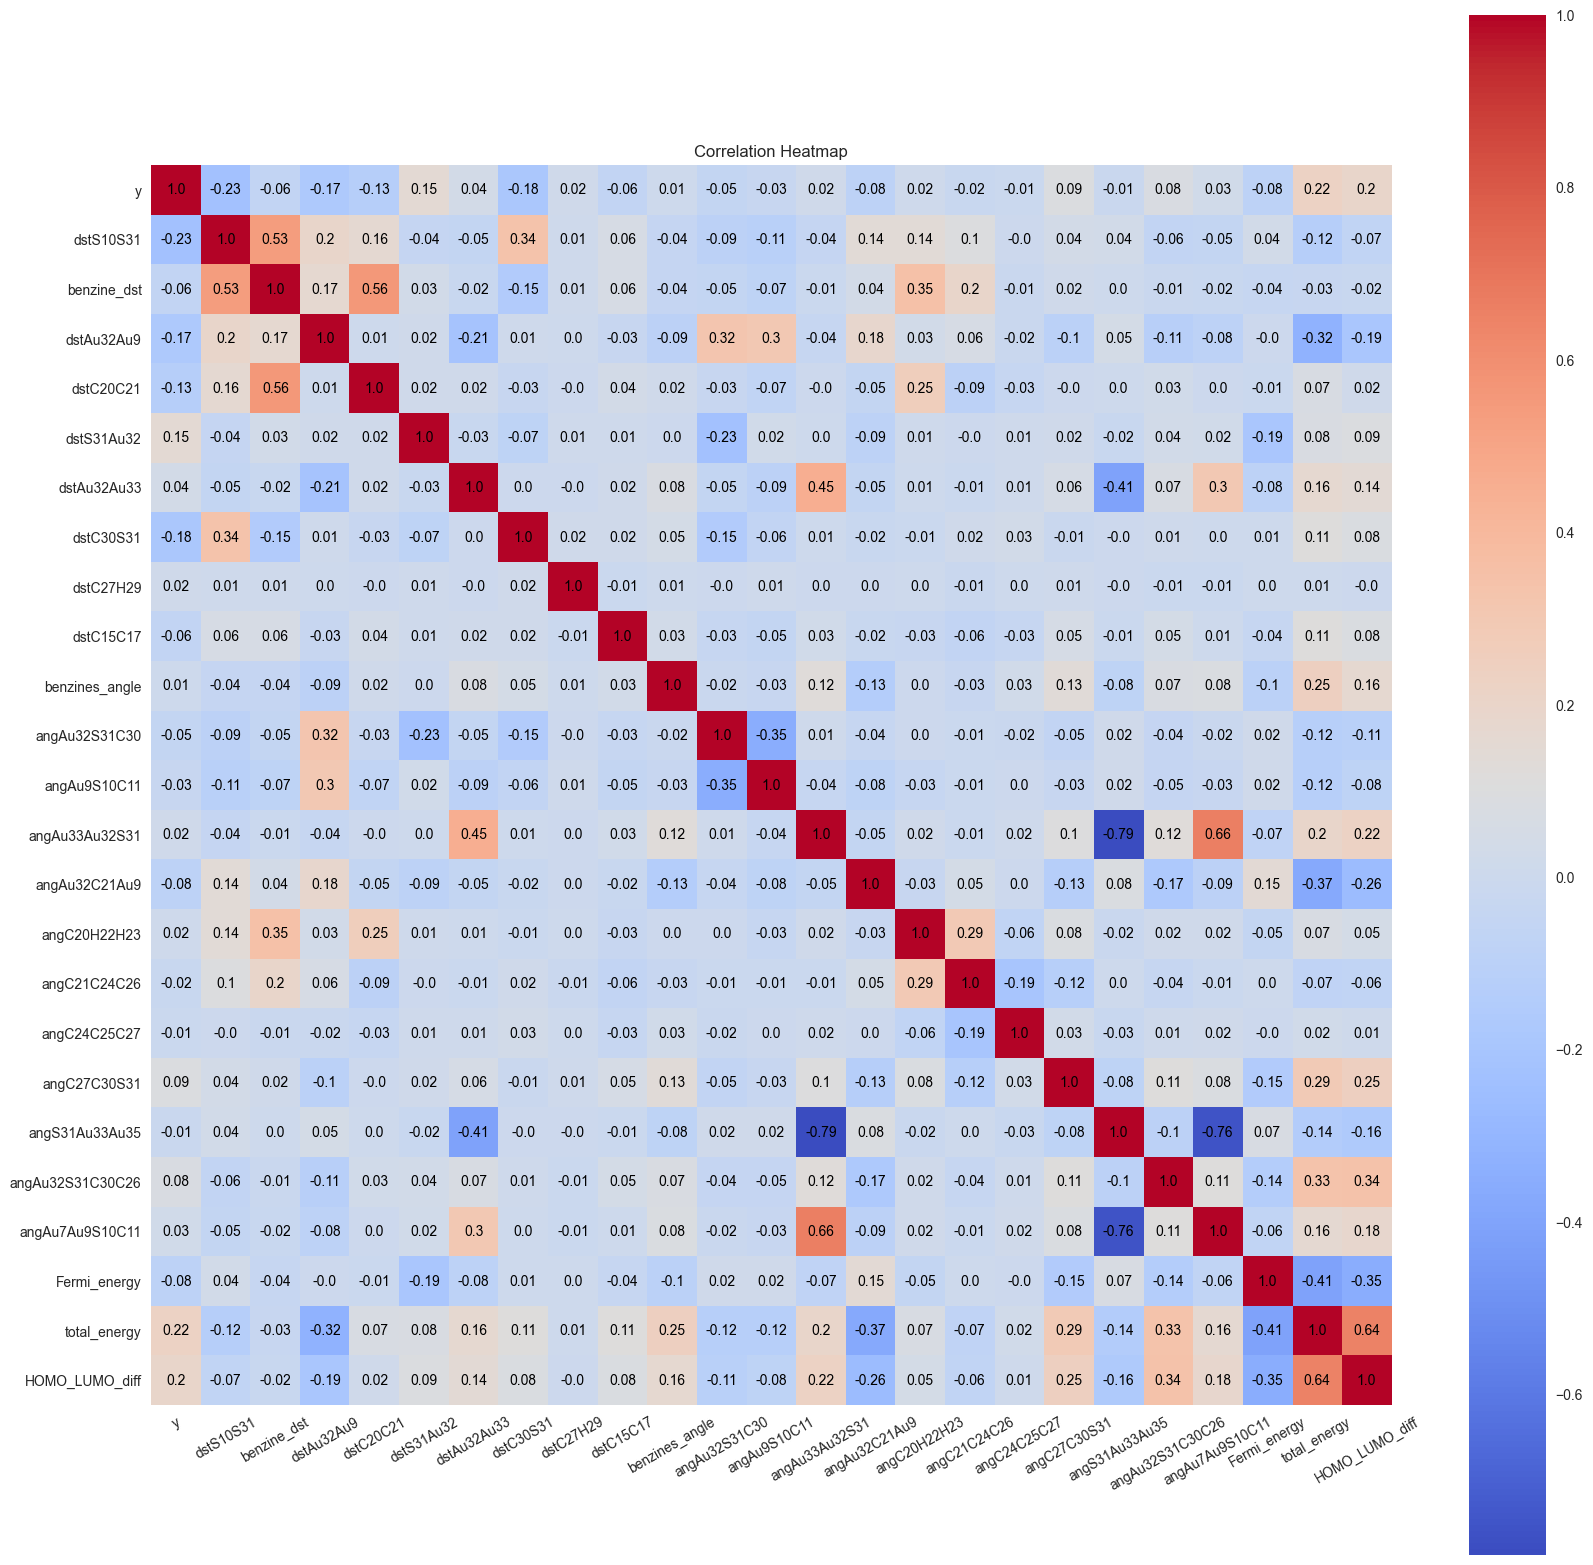

In [16]:
corr_matrix = (
    df
    .drop('obj', axis=1)
    .corr(numeric_only=False)
)
# plot a heatmap of the correlation matrix
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
im = ax.imshow(corr_matrix.values, cmap='coolwarm')

# add the column names as tick labels
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=30)
ax.set_yticklabels(corr_matrix.columns)

plt.grid(False)

# add the correlation coefficients as text annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.values[i, j], 2),
                       ha="center", va="center", color="black")

# add a color bar
cbar = ax.figure.colorbar(im, ax=ax)

# set the title and show the plot
ax.set_title("Correlation Heatmap")
plt.show()

In [37]:
corr_treshold = 0.05
restricted_features = corr_matrix[corr_matrix["y"].abs()>=corr_treshold].index[1:]

# Trening

In [38]:
import sklearn.model_selection # train test split
import sklearn.ensemble # GradientBoostingRegressor
import sklearn.metrics # mean_squared_error

seed = 0xCAFFE

y = df['y']
# X = df.drop(['y', 'obj'], axis=1)
X = df[restricted_features]


y.shape, X.shape

((8000,), (8000, 14))

In [19]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.25, random_state=seed
)
for x in [X_train, X_test, y_train, y_test]:
    print(x.shape)

(6000, 24)
(2000, 24)
(6000,)
(2000,)


In [39]:
clf = sklearn.ensemble.GradientBoostingRegressor(
    learning_rate=0.25, max_depth=3, n_estimators=100, random_state=seed
 )
# clf = sklearn.ensemble.RandomForestRegressor(
#     n_estimators=100, 
#     max_depth=None, 
#     min_samples_split=2, 
#     min_samples_leaf=1, 
#     max_features='auto', 
#     bootstrap=True,
#     random_state=seed,
# )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)

print("MSE:", mse, "\nRMSE:", rmse, "\nMAE:", mae, "\nMAPE:", mape)



MSE: 0.0011317480938041996 
RMSE: 0.033641463906973486 
MAE: 0.022600332878801175 
MAPE: 0.5993784968581826


0.026647865333667278


<Axes: >

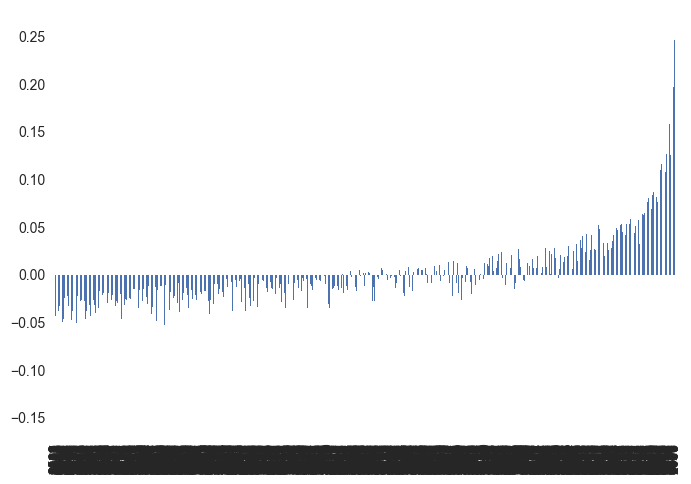

In [171]:
# plt.bar(range(len(y_test)), sorted(list(y_test - y_pred)))
results_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'diff': y_test-y_pred
})
print(results_df["diff"].abs().std())
results_df.sort_values('y_test')['diff'].plot.bar()

In [24]:
y_test.mean()

0.049962045597

# Grid Search for complex analise

In [23]:
# from sklearn.model_selection import GridSearchCV

# # create a GradientBoostingRegressor object
# clf = sklearn.ensemble.GradientBoostingRegressor()

# # define the hyperparameter grid to search over
# param_grid = {
#     'learning_rate': [0.25, 0.1, 0.05, 0.01, 0.001],
#     'n_estimators': [50],
#     'max_depth': [3, 5, 7, 9]
# }

# # define the grid search object
# grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# # fit the grid search object to the data
# grid_search.fit(X, y)

# # print the best hyperparameters and the corresponding mean squared error
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best MSE: ", abs(grid_search.best_score_))

# # predict on the test data using the best model
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
# rmse = sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)
# mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
# mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)

# print("\nMSE:", mse, "\nRMSE:", rmse, "\nMAE:", mae, "\nMAPE:", mape)



Best hyperparameters:  {'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 50}
Best MSE:  0.001090409617315136

MSE: 0.0008419199103252338 
RMSE: 0.029015856188043698 
MAE: 0.02002127521918539 
MAPE: 0.5454845029979803
